['fireplace', 'guitar', 'locobot', 'plant', 'recliner']
img_id 00114 label fireplace, id 1


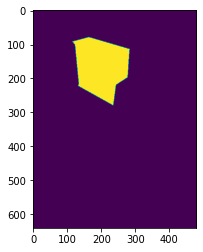

img_id 00014 label locobot, id 3


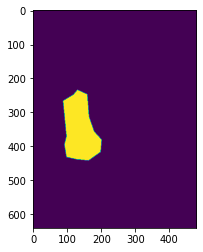

img_id 00013 label guitar, id 2


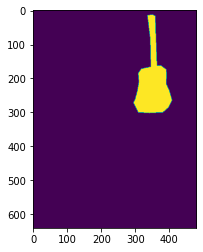

img_id 00099 label plant, id 4


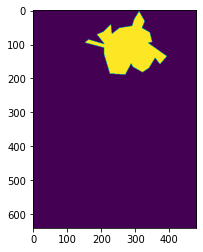

img_id 00053 label recliner, id 5


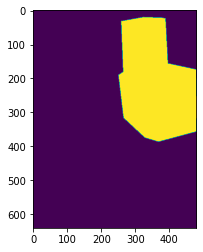

In [41]:
# convert labelme annots folder to seg

import os
import json
import labelme
import matplotlib.pyplot as plt
import numpy as np

root_dir = '/home/locobotm/baseline_explore2/default/0/'
annots = os.path.join(root_dir, 'annots')
out_dir = os.path.join(root_dir, 'seg')
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
    
# load labels dict
labels = []
with open(os.path.join(root_dir, 'labels.txt'), 'r') as f:
    labels = f.readlines()
    labels = [l.strip() for l in labels]
    labels = sorted(labels)
    print(labels)


for x in os.listdir(annots):
    with open(os.path.join(annots, x), 'rb') as f:
        dat = json.load(f)
    
    img_id = x.split('.')[0]
#     print(dat)
#     print(dat['imageData'])
    label = dat['shapes'][0]['label']
    label_id = labels.index(label) + 1
    print(f'img_id {img_id} label {label}, id {label_id}')
    png = labelme.utils.img_b64_to_arr(dat['imageData'])
    mask = labelme.utils.shape_to_mask(png.shape, dat['shapes'][0]['points'])
    mask[mask == True] = label_id
    mask[mask == False] = 0
    
#     print(mask)
    plt.imshow(mask)
    plt.show()
    
    out_f = os.path.join(out_dir, f'{img_id}.npy')
    np.save(out_f, mask)
#     print(dat)

In [4]:
import labelme

In [ ]:
labelme.utils.img_data_to_png_data